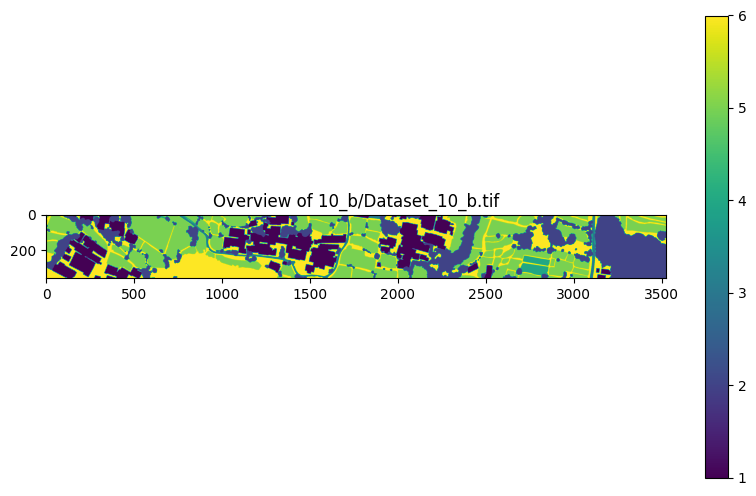

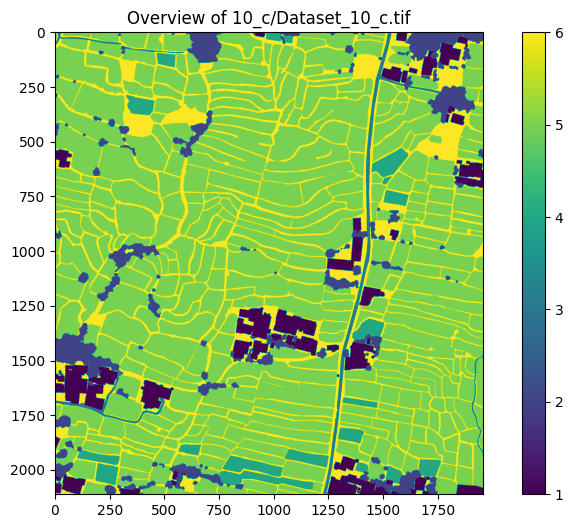

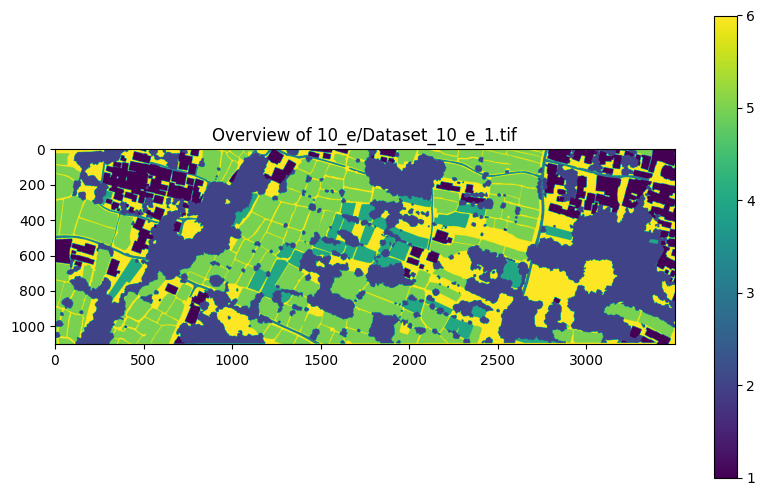

({'driver': 'GTiff',
  'dtype': 'float32',
  'nodata': 6.0,
  'width': 3524,
  'height': 360,
  'count': 1,
  'crs': CRS.from_epsg(3857),
  'transform': Affine(0.25, 0.0, 12644115.385315826,
         0.0, -0.25, -786479.9062432916)},
 {'driver': 'GTiff',
  'dtype': 'float32',
  'nodata': 6.0,
  'width': 1958,
  'height': 2112,
  'count': 1,
  'crs': CRS.from_epsg(3857),
  'transform': Affine(0.25, 0.0, 12644507.015410762,
         0.0, -0.25, -786569.6898451351)},
 {'driver': 'GTiff',
  'dtype': 'float32',
  'nodata': 6.0,
  'width': 3500,
  'height': 1099,
  'count': 1,
  'crs': CRS.from_epsg(3857),
  'transform': Affine(0.25, 0.0, 12644123.357127203,
         0.0, -0.25, -787091.6084042088)})

In [36]:
import rasterio
import matplotlib.pyplot as plt

data_b = "10_b/Dataset_10_b.tif"
data_c = "10_c/Dataset_10_c.tif"
data_e = "10_e/Dataset_10_e_1.tif"


def load_and_inspect_tif(file_path):
    with rasterio.open(file_path) as src:
        metadata = src.meta
        data = src.read(1)
        plt.figure(figsize=(10, 6))
        plt.imshow(data, cmap='viridis')
        plt.colorbar()
        plt.title(f"Overview of {file_path}")
        plt.show()
        
    return metadata, data

data_b_metadata, data_b_data = load_and_inspect_tif(data_b)
data_c_metadata, data_c_data = load_and_inspect_tif(data_c)
data_e_metadata, data_e_data = load_and_inspect_tif(data_e)


data_b_metadata, data_c_metadata, data_e_metadata

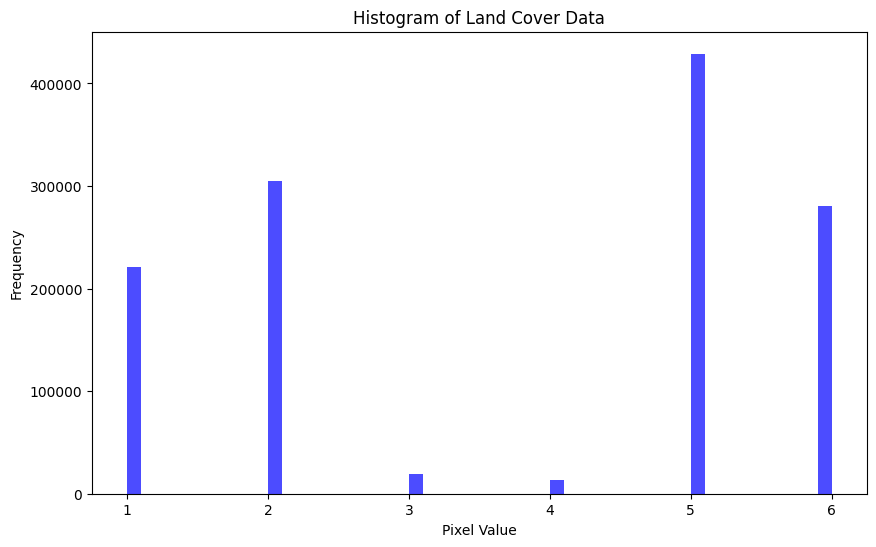

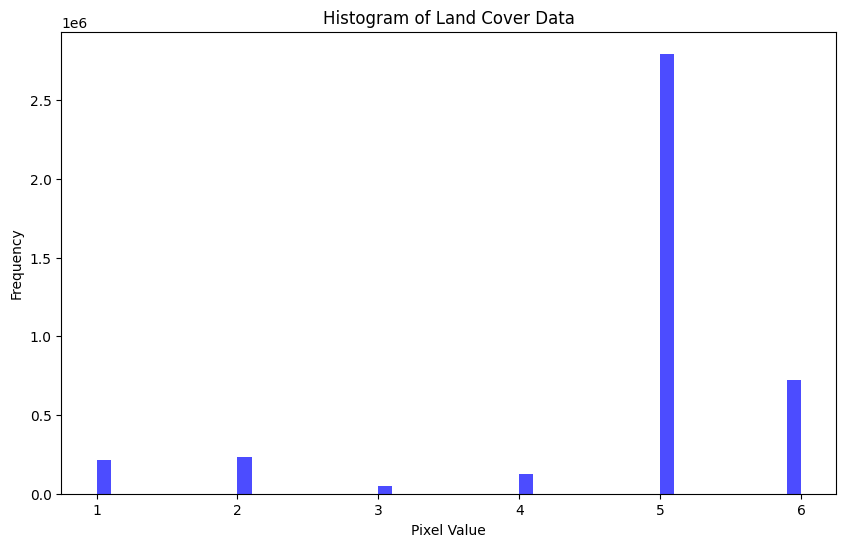

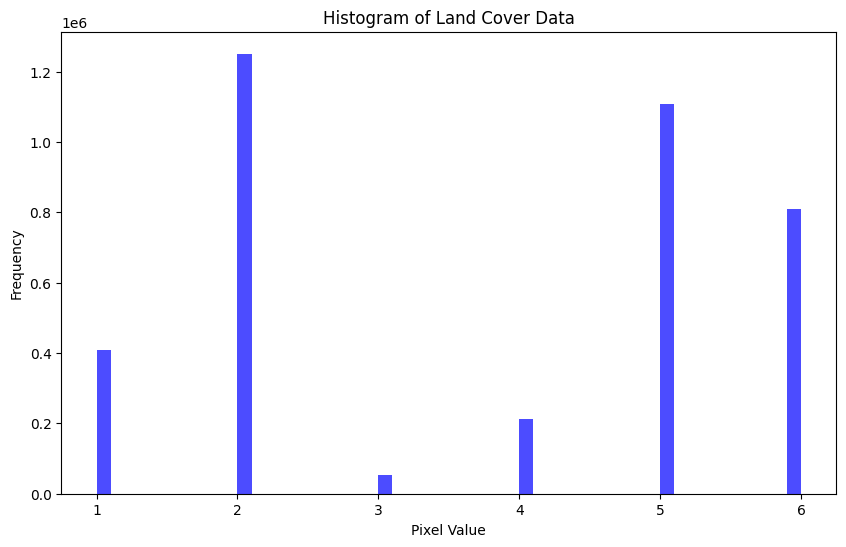

({'mean': 3.7617095,
  'std': 1.9264468,
  'min': 1.0,
  'max': 6.0,
  'unique_values': array([1., 2., 3., 4., 5., 6.], dtype=float32)},
 {'mean': 4.744917,
  'std': 1.2331471,
  'min': 1.0,
  'max': 6.0,
  'unique_values': array([1., 2., 3., 4., 5., 6.], dtype=float32)},
 {'mean': 3.7251809,
  'std': 1.824314,
  'min': 1.0,
  'max': 6.0,
  'unique_values': array([1., 2., 3., 4., 5., 6.], dtype=float32)})

In [37]:
import numpy as np

def analyze_data(data, title):
    stats = {
        'mean': np.mean(data),
        'std': np.std(data),
        'min': np.min(data),
        'max': np.max(data),
        'unique_values': np.unique(data)
    }
    
    # Plot histogram
    plt.figure(figsize=(10, 6))
    plt.hist(data.flatten(), bins=50, color='blue', alpha=0.7)
    plt.title(f"Histogram of {title}")
    plt.xlabel("Pixel Value")
    plt.ylabel("Frequency")
    plt.show()
    
    return stats

data_b_stats = analyze_data(data_b_data, "Land Cover Data")
data_c_stats = analyze_data(data_c_data, "Land Cover Data")
data_e_stats = analyze_data(data_e_data, "Land Cover Data")

data_b_stats, data_c_stats, data_e_stats

In [38]:
def print_detailed_metadata(file_path):
    with rasterio.open(file_path) as src:
        return src.tags()

data_b_tags = print_detailed_metadata(data_b)
data_c_tags = print_detailed_metadata(data_c)
data_e_tags = print_detailed_metadata(data_e)

data_b_tags, data_c_tags, data_e_tags


({'AREA_OR_POINT': 'Area'},
 {'AREA_OR_POINT': 'Area'},
 {'AREA_OR_POINT': 'Area'})

In [39]:
def plot_comparison_with_masks(original_data, title):
    unique_values = np.unique(original_data)
    fig, axes = plt.subplots(len(unique_values) + 1, 1, figsize=(15, 20))
    fig.suptitle(f"Comparison of {title} with Unique Value Masks", fontsize=16)

    axes[0].imshow(original_data, cmap='viridis')
    axes[0].set_title("Original Image", fontsize=14)
    axes[0].axis('off')

    for i, value in enumerate(unique_values):
        ax = axes[i + 1]
        ax.imshow(original_data == value, cmap='viridis')
        ax.set_title(f"Value: {value}", fontsize=14)
        ax.axis('off')

    plt.tight_layout()
    plt.subplots_adjust(top=0.95)
    plt.show()

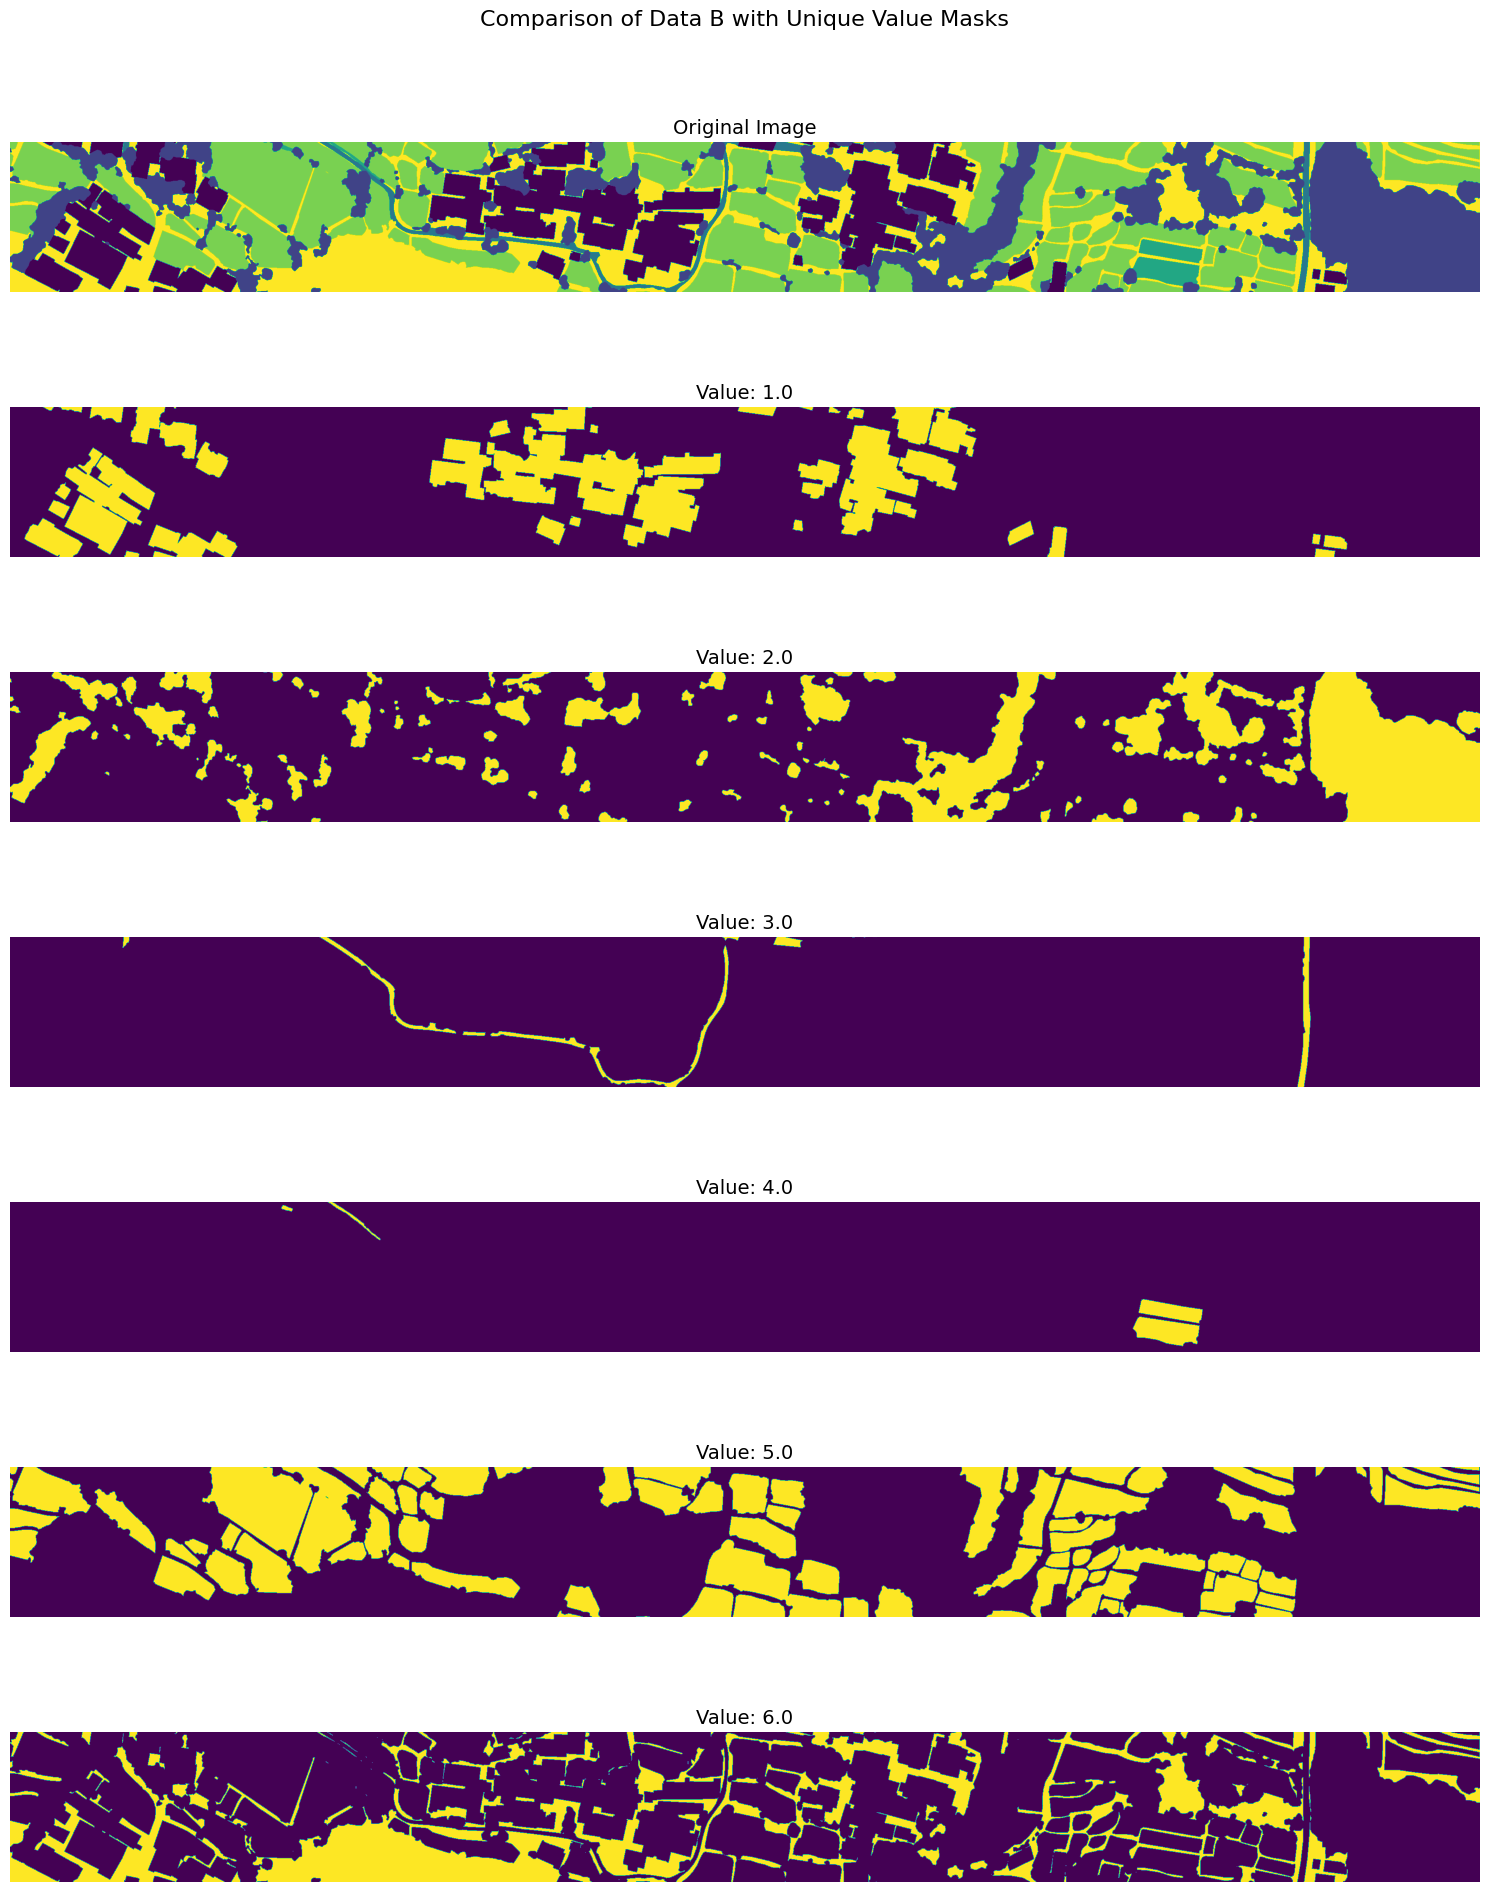

In [40]:
plot_comparison_with_masks(data_b_data, "Data B")

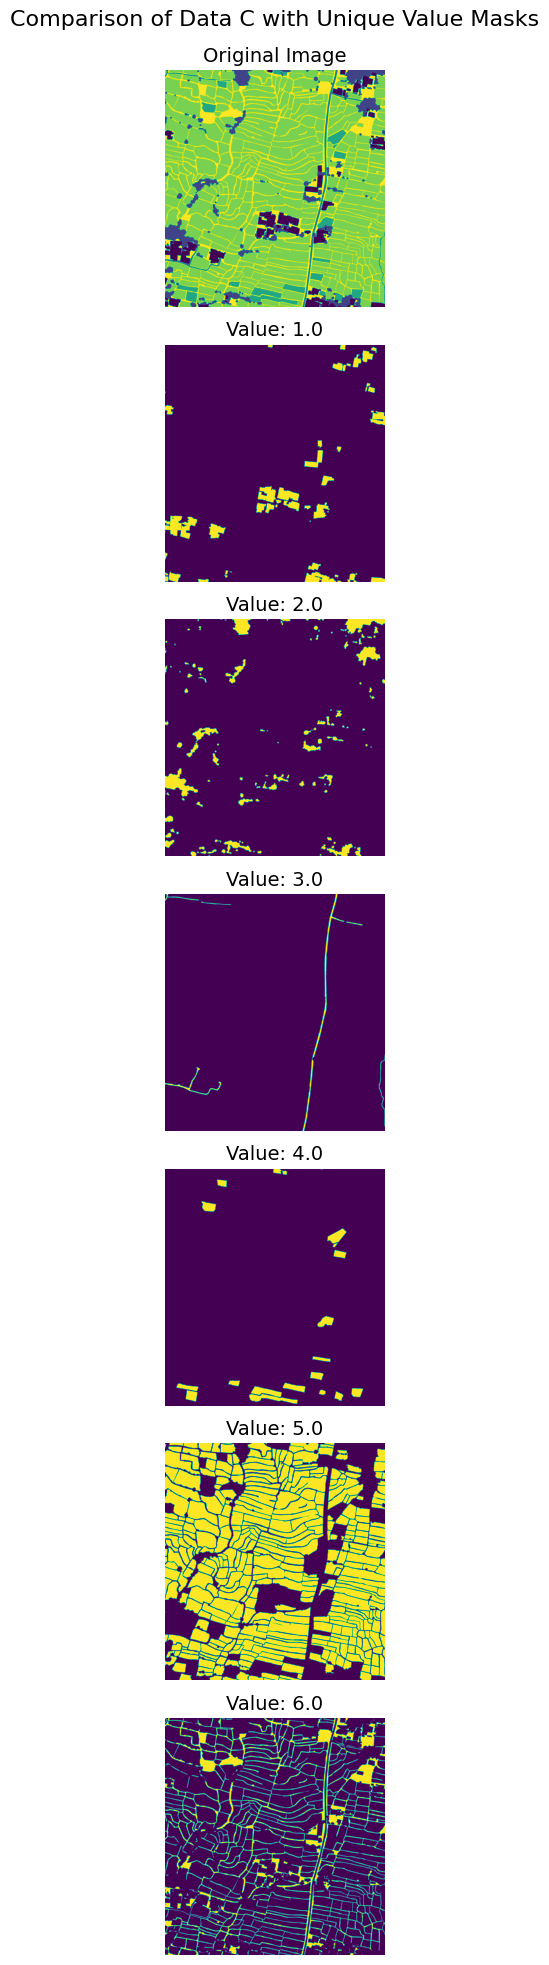

In [41]:
plot_comparison_with_masks(data_c_data, "Data C")

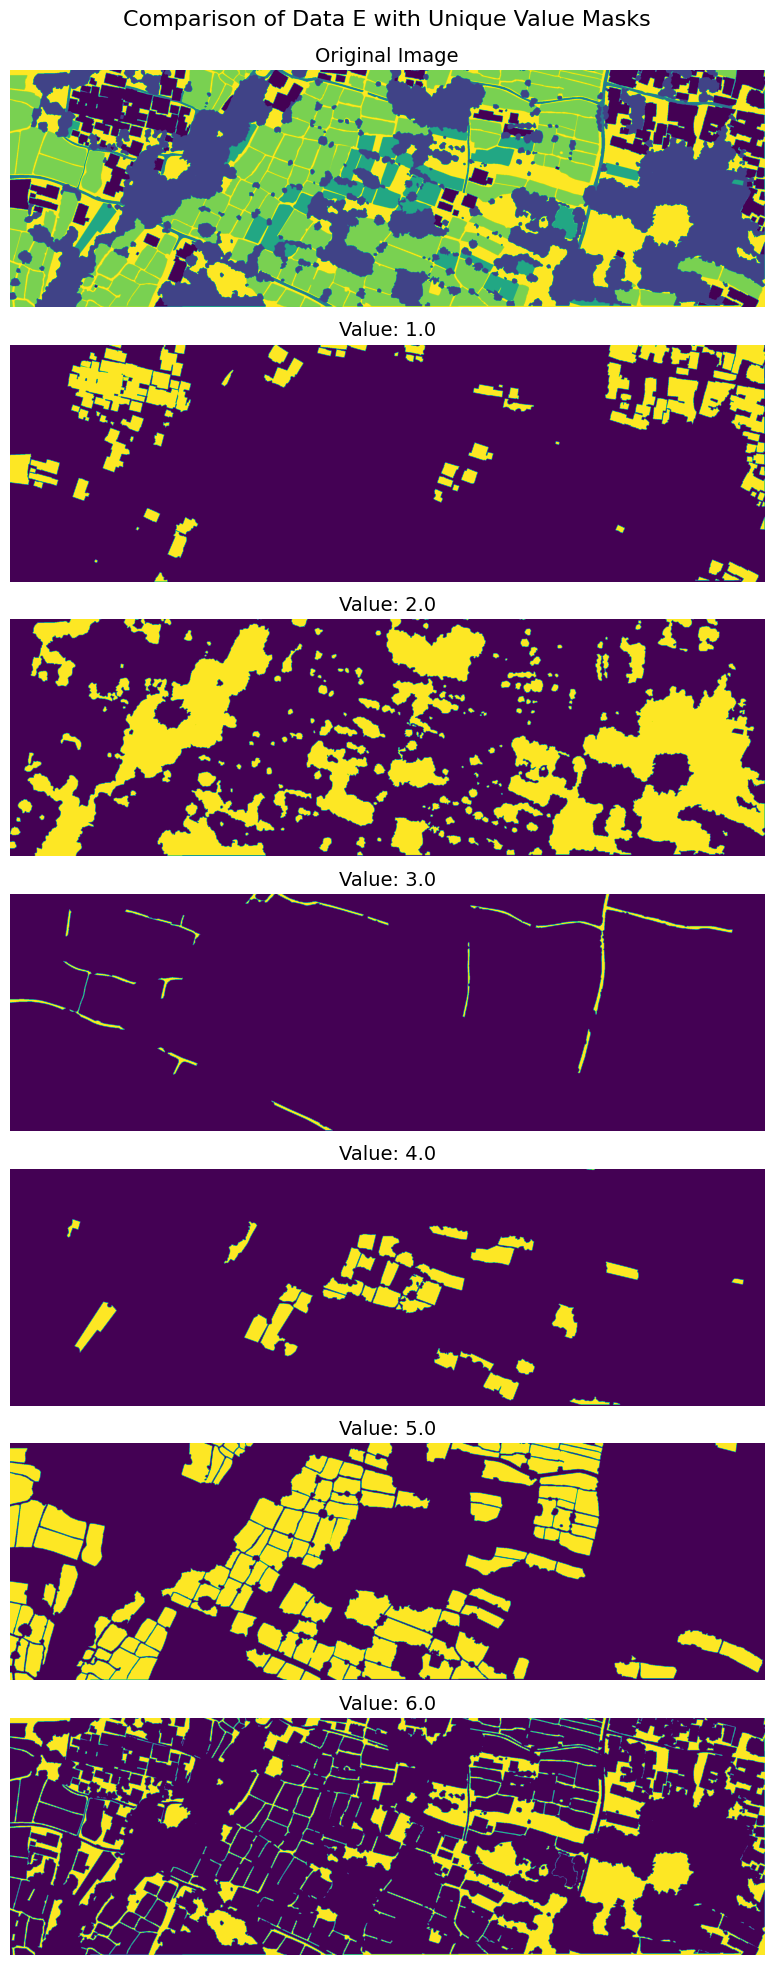

In [42]:
plot_comparison_with_masks(data_e_data, "Data E")

In [43]:
def extract_data(file_path):
    with rasterio.open(file_path) as src:
        return src.read(1)

In [44]:
extracted_data_b = extract_data(data_b)
extracted_data_c = extract_data(data_c)
extracted_data_e = extract_data(data_e)

In [45]:
import pandas as pd

def calculate_distribution(data):
    unique_values, counts = np.unique(data, return_counts=True)
    distribution = pd.DataFrame({'Land Cover Type': unique_values, 'Count': counts})
    distribution['Percentage'] = (distribution['Count'] / distribution['Count'].sum()) * 100
    return distribution

distribution_b = calculate_distribution(extracted_data_b)
distribution_c = calculate_distribution(extracted_data_c)
distribution_e = calculate_distribution(extracted_data_e)

In [46]:
distribution_b, distribution_c, distribution_e

(   Land Cover Type   Count  Percentage
 0              1.0  220909   17.413057
 1              2.0  305327   24.067269
 2              3.0   19196    1.513116
 3              4.0   13563    1.069098
 4              5.0  429018   33.817159
 5              6.0  280627   22.120302,
    Land Cover Type    Count  Percentage
 0              1.0   213225    5.156221
 1              2.0   234371    5.667575
 2              3.0    47656    1.152421
 3              4.0   124692    3.015310
 4              5.0  2794183   67.569117
 5              6.0   721169   17.439356,
    Land Cover Type    Count  Percentage
 0              1.0   409704   10.651345
 1              2.0  1251154   32.527077
 2              3.0    53591    1.393241
 3              4.0   213466    5.549617
 4              5.0  1109251   28.837931
 5              6.0   809334   21.040790)

In [47]:
def calculate_statistics(data, class_value):
    class_data = data[data == class_value]
    if class_data.size == 0:
        return {
            'count': 0
        }
    return {
        'count': class_data.size
    }

class_labels = {
    1: 'Home/Building',
    2: 'Trees',
    3: 'Water',
    4: 'Short vegetation',
    5: 'Rice field',
    6: 'Others'
}

def analyze_dataset(data):
    stats = {}
    for class_value, label in class_labels.items():
        stats[label] = calculate_statistics(data, class_value)
    return pd.DataFrame(stats).T

In [48]:
stats_b = analyze_dataset(extracted_data_b)
stats_c = analyze_dataset(extracted_data_c)
stats_e = analyze_dataset(extracted_data_e)

stats_b, stats_c, stats_e

(                   count
 Home/Building     220909
 Trees             305327
 Water              19196
 Short vegetation   13563
 Rice field        429018
 Others            280627,
                     count
 Home/Building      213225
 Trees              234371
 Water               47656
 Short vegetation   124692
 Rice field        2794183
 Others             721169,
                     count
 Home/Building      409704
 Trees             1251154
 Water               53591
 Short vegetation   213466
 Rice field        1109251
 Others             809334)

In [49]:
import matplotlib.colors as mcolors

# Define the class labels and corresponding colors
class_labels = {
    0: 'No Data',
    1: 'Home/Building',
    2: 'Trees',
    3: 'road',
    4: 'Short vegetation',
    5: 'Rice field',
    6: 'Others'
}

class_colors = {
    0: 'black',
    1: 'red',
    2: 'green',
    3: 'blue',
    4: 'yellow',
    5: 'cyan',
    6: 'magenta'
}

In [50]:
cmap = mcolors.ListedColormap([class_colors[val] for val in class_labels.keys()])
norm = mcolors.BoundaryNorm(boundaries=np.arange(len(class_labels) + 2) - 0.5, ncolors=len(class_labels) + 1)

In [51]:
def plot_class_distribution(data, title):
    plt.figure(figsize=(12, 8))
    plt.imshow(data, cmap=cmap, norm=norm)
    plt.colorbar(ticks=np.arange(len(class_labels)) + 1, format=plt.FuncFormatter(lambda x, _: class_labels.get(int(x), '')))
    plt.title(f'Class Distribution: {title}')
    plt.axis('off')
    plt.show()

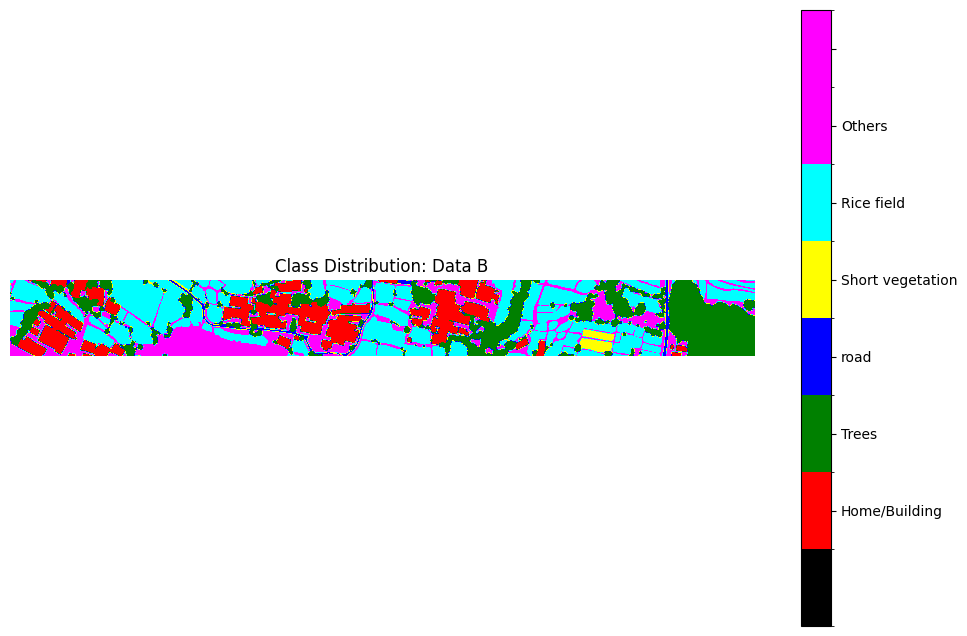

In [52]:
plot_class_distribution(extracted_data_b, "Data B")

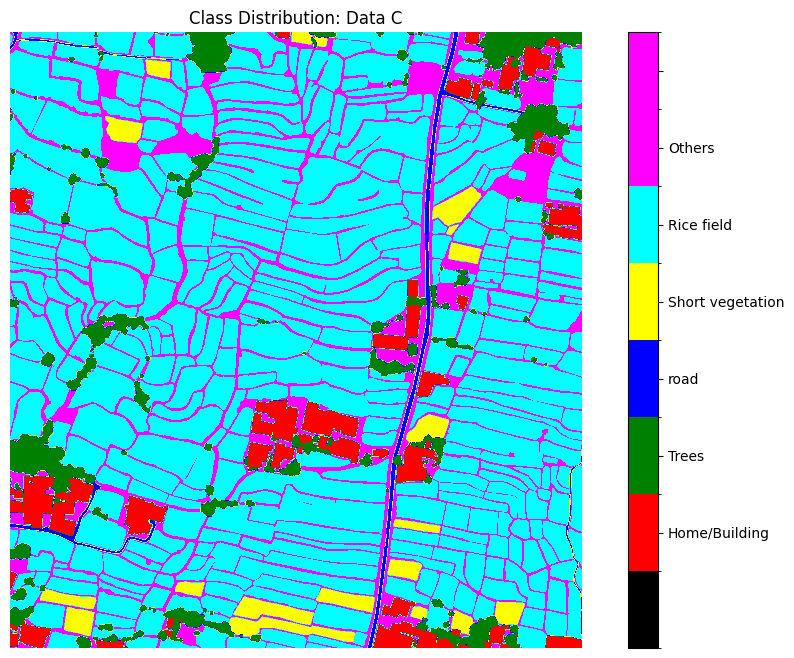

In [53]:
plot_class_distribution(extracted_data_c, "Data C")

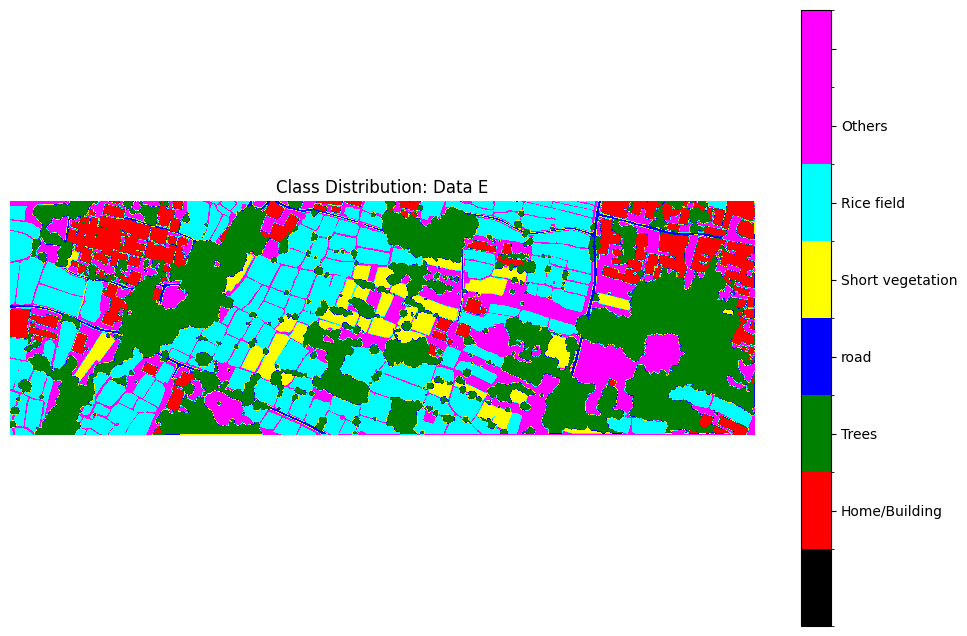

In [54]:
plot_class_distribution(extracted_data_e, "Data E")

In [55]:
def create_patches(data, patch_size=256):
    patches = []
    for i in range(0, data.shape[0], patch_size):
        for j in range(0, data.shape[1], patch_size):
            patch = data[i:i+patch_size, j:j+patch_size]
            if patch.shape == (patch_size, patch_size):
                patches.append(patch)
    return np.array(patches)

In [56]:
# import os
# import shutil

# def save_patches(data, output_folder, patch_size=256):
#     if os.path.exists(output_folder):
#         shutil.rmtree(output_folder)
#     os.makedirs(output_folder)
    
#     patches = create_patches(data, patch_size)
#     for i, patch in enumerate(patches):
#         patch_filename = os.path.join(output_folder, f"patch_{i}.tif")
#         with rasterio.open(patch_filename, 'w', driver='GTiff', height=patch_size, width=patch_size, count=1, dtype=data.dtype) as dst:
#             dst.write(patch, 1)
#     return len(patches)

# train_folder = "train"
# test_folder = "test"

# num_train_patches = save_patches(extracted_data_b, train_folder)
# num_test_patches = save_patches(extracted_data_c, test_folder)

# num_train_patches, num_test_patches

In [57]:
# def visualize_patches(folder, num_patches=4):
#     patch_files = os.listdir(folder)
#     num_patches = min(num_patches, len(patch_files))
#     fig, axes = plt.subplots(1, num_patches, figsize=(15, 15))
#     for i in range(num_patches):
#         patch_file = patch_files[i]
#         with rasterio.open(os.path.join(folder, patch_file)) as src:
#             patch_data = src.read(1)
#             axes[i].imshow(patch_data, cmap='viridis')
#             axes[i].set_title(patch_file)
#             axes[i].axis('off')
#     plt.show()

# visualize_patches(train_folder)
 
# visualize_patches(test_folder)

In [58]:
patches_b = create_patches(extracted_data_b)
patches_c = create_patches(extracted_data_c)
patches_e = create_patches(extracted_data_e)

patches_b.shape, patches_c.shape, patches_e.shape

((13, 256, 256), (56, 256, 256), (52, 256, 256))

In [82]:
all_patches = np.concatenate([patches_b, patches_c, patches_e])
all_patches[all_patches == 6] = 5
all_patches.shape

(121, 256, 256)

In [83]:
X = all_patches[..., np.newaxis]  # Add channel dimension
y = all_patches

# Ensure labels are integers and have shape (batch_size, height, width)
y = y.astype(np.int32).reshape((all_patches.shape[0], 256, 256))

In [84]:
X.shape, y.shape

((121, 256, 256, 1), (121, 256, 256))

In [85]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [86]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((96, 256, 256, 1), (25, 256, 256, 1), (96, 256, 256), (25, 256, 256))

In [87]:
import tensorflow as tf
from tensorflow.keras import layers, models

In [88]:
def unet_model(input_size=(256, 256, 1)):
    inputs = layers.Input(input_size)

    # Downsampling
    c1 = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(inputs)
    c1 = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(c1)
    p1 = layers.MaxPooling2D((2, 2))(c1)

    c2 = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(p1)
    c2 = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(c2)
    p2 = layers.MaxPooling2D((2, 2))(c2)

    c3 = layers.Conv2D(256, (3, 3), activation='relu', padding='same')(p2)
    c3 = layers.Conv2D(256, (3, 3), activation='relu', padding='same')(c3)
    p3 = layers.MaxPooling2D((2, 2))(c3)

    c4 = layers.Conv2D(512, (3, 3), activation='relu', padding='same')(p3)
    c4 = layers.Conv2D(512, (3, 3), activation='relu', padding='same')(c4)
    p4 = layers.MaxPooling2D(pool_size=(2, 2))(c4)

    # Bottleneck
    c5 = layers.Conv2D(1024, (3, 3), activation='relu', padding='same')(p4)
    c5 = layers.Conv2D(1024, (3, 3), activation='relu', padding='same')(c5)

    # Upsampling
    u6 = layers.Conv2DTranspose(512, (2, 2), strides=(2, 2), padding='same')(c5)
    u6 = layers.concatenate([u6, c4])
    c6 = layers.Conv2D(512, (3, 3), activation='relu', padding='same')(u6)
    c6 = layers.Conv2D(512, (3, 3), activation='relu', padding='same')(c6)

    u7 = layers.Conv2DTranspose(256, (2, 2), strides=(2, 2), padding='same')(c6)
    u7 = layers.concatenate([u7, c3])
    c7 = layers.Conv2D(256, (3, 3), activation='relu', padding='same')(u7)
    c7 = layers.Conv2D(256, (3, 3), activation='relu', padding='same')(c7)

    u8 = layers.Conv2DTranspose(128, (2, 2), strides=(2, 2), padding='same')(c7)
    u8 = layers.concatenate([u8, c2])
    c8 = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(u8)
    c8 = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(c8)

    u9 = layers.Conv2DTranspose(64, (2, 2), strides=(2, 2), padding='same')(c8)
    u9 = layers.concatenate([u9, c1], axis=3)
    c9 = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(u9)
    c9 = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(c9)

    outputs = layers.Conv2D(6, (1, 1), activation='softmax')(c9)  # Change to softmax for multi-class

    model = models.Model(inputs=[inputs], outputs=[outputs])

    return model

In [89]:
model = unet_model()

In [90]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_3       │ (None, 256, 256,  │          0 │ -                 │
│ (InputLayer)        │ 1)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_57 (Conv2D)  │ (None, 256, 256,  │        640 │ input_layer_3[0]… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_58 (Conv2D)  │ (None, 256, 256,  │     36,928 │ conv2d_57[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_12    │ (None, 128, 128,  │          0 │ conv2d_58[0][0]   │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_59 (Conv2D)  │ (None, 128, 128,  │     73,856 │ max_pooling2d_12… │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_60 (Conv2D)  │ (None, 128, 128,  │    147,584 │ conv2d_59[0][0]   │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_13    │ (None, 64, 64,    │          0 │ conv2d_60[0][0]   │
│ (MaxPooling2D)      │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_61 (Conv2D)  │ (None, 64, 64,    │    295,168 │ max_pooling2d_13… │
│                     │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_62 (Conv2D)  │ (None, 64, 64,    │    590,080 │ conv2d_61[0][0]   │
│                     │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_14    │ (None, 32, 32,    │          0 │ conv2d_62[0][0]   │
│ (MaxPooling2D)      │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_63 (Conv2D)  │ (None, 32, 32,    │  1,180,160 │ max_pooling2d_14… │
│                     │ 512)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_64 (Conv2D)  │ (None, 32, 32,    │  2,359,808 │ conv2d_63[0][0]   │
│                     │ 512)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_15    │ (None, 16, 16,    │          0 │ conv2d_64[0][0]   │
│ (MaxPooling2D)      │ 512)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_65 (Conv2D)  │ (None, 16, 16,    │  4,719,616 │ max_pooling2d_15… │
│                     │ 1024)             │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_66 (Conv2D)  │ (None, 16, 16,    │  9,438,208 │ conv2d_65[0][0]   │
│                     │ 1024)             │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_transpose_12 │ (None, 32, 32,    │  2,097,664 │ conv2d_66[0][0]   │
│ (Conv2DTranspose)   │ 512)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_12      │ (None, 32, 32,    │          0 │ conv2d_transpose

 Total params: 31,030,918 (118.37 MB)

 Trainable params: 31,030,918 (118.37 MB)

 Non-trainable params: 0 (0.00 B)

In [91]:
history = model.fit(X_train, y_train, epochs=10, batch_size=4)

Epoch 1/10


24/24 ━━━━━━━━━━━━━━━━━━━━ 112s 4s/step - accuracy: 0.5785 - loss: 1.0404
Epoch 2/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 144s 6s/step - accuracy: 0.6716 - loss: 0.7554
Epoch 3/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 139s 6s/step - accuracy: 0.8357 - loss: 0.5750
Epoch 4/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 313s 13s/step - accuracy: 0.9336 - loss: 0.2721
Epoch 5/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 147s 6s/step - accuracy: 0.9360 - loss: 0.1660
Epoch 6/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 142s 6s/step - accuracy: 0.9622 - loss: 0.0928
Epoch 7/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 327s 14s/step - accuracy: 0.9674 - loss: 0.1094
Epoch 8/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 207s 9s/step - accuracy: 0.9875 - loss: 0.0327
Epoch 9/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 217s 9s/step - accuracy: 0.9917 - loss: 0.0241
Epoch 10/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 360s 15s/step - accuracy: 0.9977 - loss: 0.0092


In [92]:
model.evaluate(X_test, y_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step - accuracy: 0.9985 - loss: 0.0065


[0.006492568179965019, 0.9985290765762329]

In [93]:
def plot_loss_accuracy(history):
    loss = history.history['loss']
    accuracy = history.history['accuracy']

    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(loss, label='Loss')
    plt.title('Training Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(accuracy, label='Accuracy')
    plt.title('Training Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.show()  


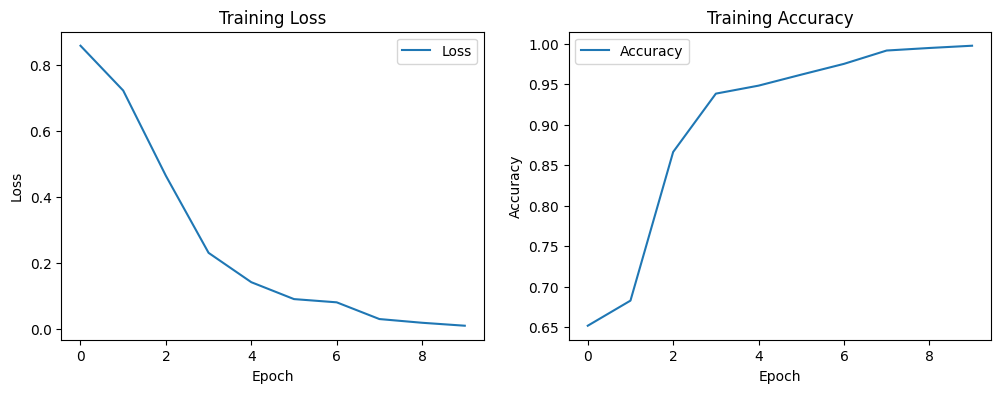

In [94]:
plot_loss_accuracy(history)

In [101]:
def predict_and_visualize(model, X, y, num_samples=5):
    y_pred = model.predict(X)
    for i in range(num_samples):
        fig, axes = plt.subplots(1, 2, figsize=(15, 5))
        axes[0].imshow(X[i, ..., 0], cmap='viridis')
        axes[0].set_title('Ground Truth')
        axes[0].axis('off')

        axes[1].imshow(y_pred[i].argmax(axis=-1), cmap=cmap, norm=norm)
        axes[1].set_title('Predicted Label')
        axes[1].axis('off')

        plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step


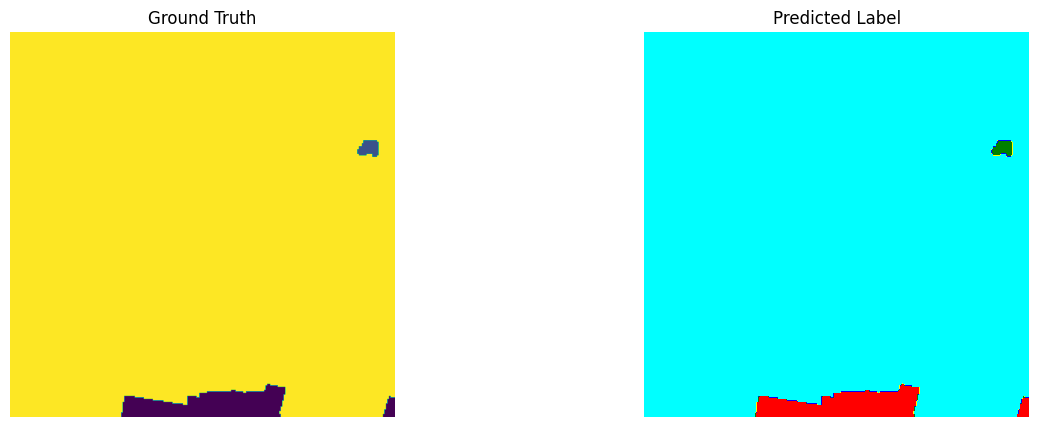

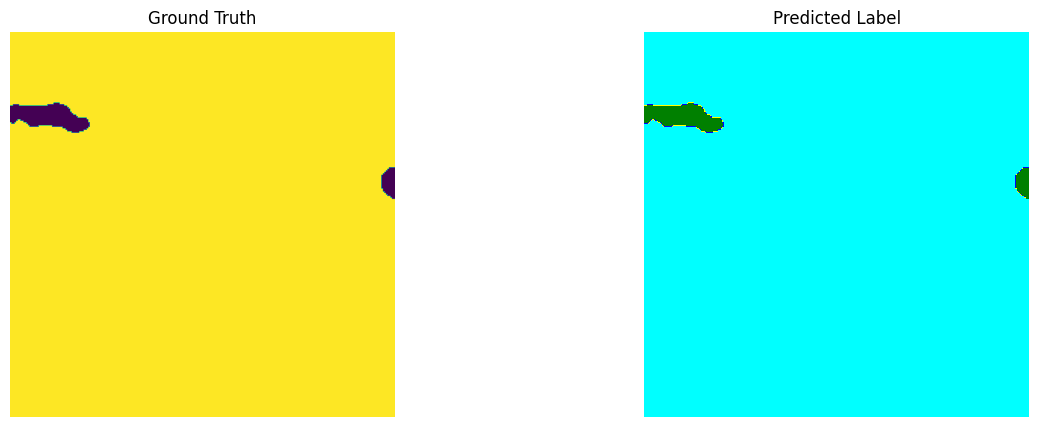

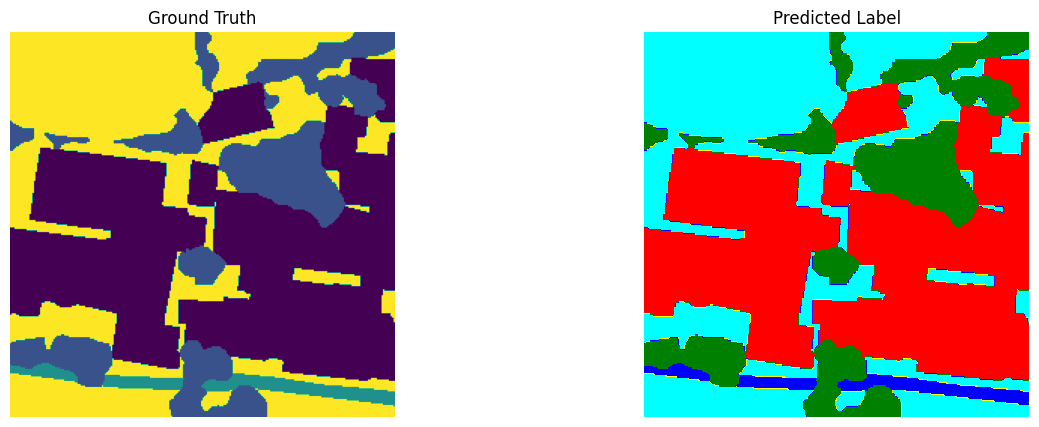

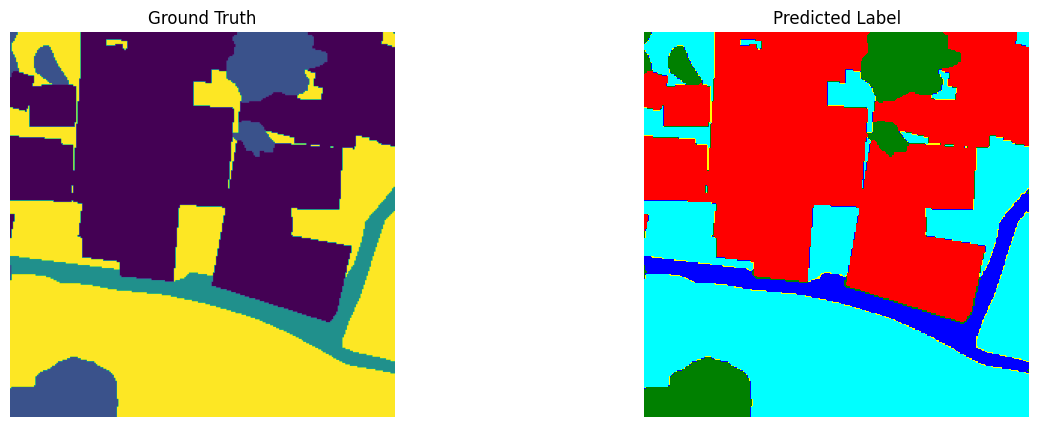

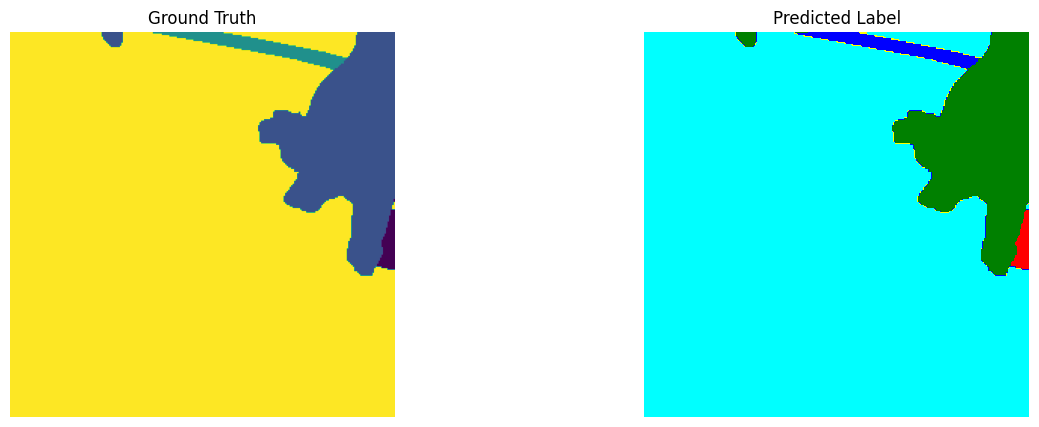

In [102]:
predict_and_visualize(model, X_test, y_test)

In [103]:
model.save("unet_land_cover_segmentation.h5")